# Feature writing tips

**Keep these tips in mind as you write your first feature file.**

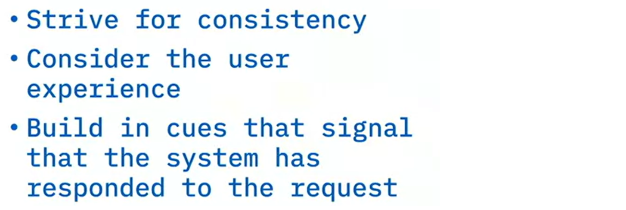

**Strive for consistency.** 
* Remember that Behave uses string matching to find the Python steps to execute. 
* Say you have the string **“I see”** in one **Gherkin** statement and **“I should see”** in another. 
* These are two different strings, so you will need to write two separate Python steps to match them, one for each string. 
* But if those strings are executing the same code, just choose one of the strings to use in your feature file.
* Be consistent so that you don’t need to write duplicate Python steps.

When writing a feature file, **you should also consider the user experience**. 
* You’re describing the behavior that you want the user to see. 
* If you have a field on the interface called **“Customer ID”** use that exact name in the feature file. 
* I’ve seen developers write feature files that might use a variable name like `customer_id` because that’s the field behind the scenes that gets updated. 
* The problem is that your stakeholder isn’t going to know what you’re talking about because the field that they see on the screen is **Customer ID**. 
* **Always write the feature files as if you were explaining how to use the feature**, not what the feature does under the covers. 

Another big tip is to **build in cues that signal that the system has responded to a request**. 
* These cues can help with latency issues when you’re testing remotely. 
* For example, say you’re checking that a **Search/Submit** button works when someone clicks it. 
* Make sure that you have an on-screen status that gets updated once the request is complete. 
* That way, you can tell the testing tools to wait for the status before checking the results.


# Example: Search for pets by category

Now, let’s discuss an example to show how you write one of these feature files. 

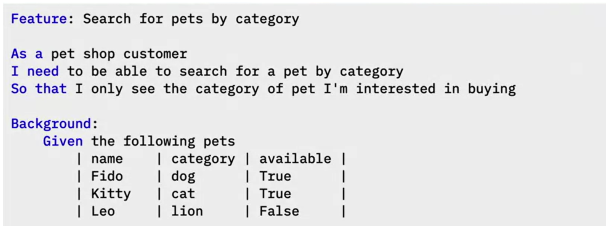

Our example is from a pet shop. This shop wants to allow customers who come to their website to be able to search for pets by category. 
* You start by writing your feature file with the keyword "`Feature: Search for pets by category`”.
* Next, you add the user story: 
> As a pet shop customer
>
> I need to be able to search for a pet by category
>
> So that I only see the category of pet that I’m interested in buying”

Next, you use the keyword: “`Background`”. 
* Sometimes several scenarios in the same feature start with the same `context`. 
* `Background` is a **test fixture** that you can use to specify the `context` once and then establish it before every scenario in the feature. 
* Typically, you use `Background` with one or more `Given` statements to set up the initial testing state, but you can use any keyword that fits. 
* In this example, you use: “`Given the following pets`”. 
* This `Given` statement is just like any other. 
* Behave will search all of the Python step files for a `Given` decorator followed by the string “`the following pets`”.

Under the `Given` statement, you create a **data table**. 
* You have to indent the table to associate it with the `Given` statement. 
* To set up a working table, you must delimit its columns with vertical bars and use its first row to designate the column names. 
* In this example, you have three column names: `name`, `category`, and `available`.
* The other rows contain the data that you want the table to have at the beginning of every scenario. 

Remember: 
* Since you included this table in the `Background` test fixture, its data will reload for each scenario. 
* So, for example, if one scenario deletes one of the pets, Behave will reload that table and that pet will be there for the next scenario.


# Search for dogs

Now you can write a scenario.

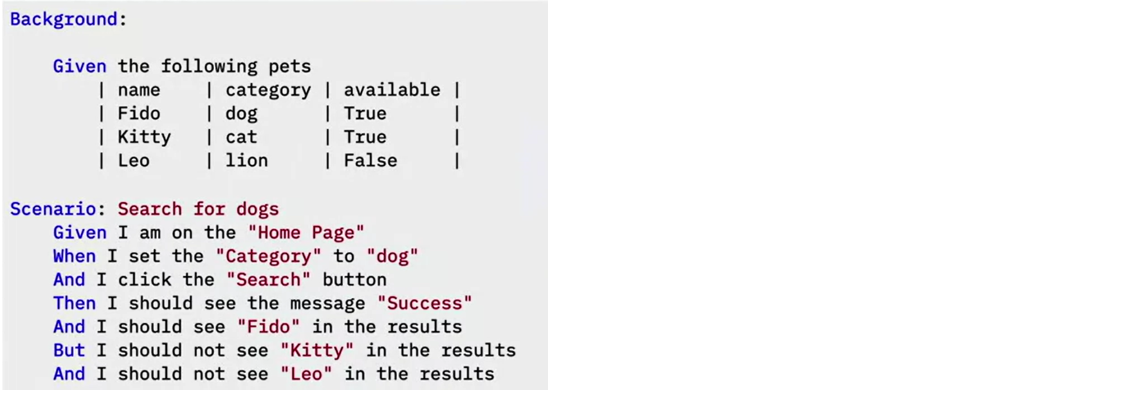

You want to describe what happens when a customer at the pet shop website’s home page enters “`dog`” into the category field and clicks the “`Search`” button.

You start with the `Scenario` keyword, followed by a **title** for this scenario: “`Search for dogs`”. 

Next, you set up the initial state with a `Given` keyword: “`Given I am on the home page`”. 

Next, you add the event: **“`When I set the ‘Category’ to ‘dog’`”**. 
* This statement does more than describe the action of the user.
* It also tells the developers that on the home page, they need a field of some kind where the user can specify the text **“dog”** as the search criteria.

The second part of the event is **“`And I click on the ‘Search’ button`”**. 
* Now the developers know that in addition to a `category` field, they need to provide a **search button**.
* These two sentences give a lot of information about what is needed on the **home page** for this scenario.

Now it’s time for your measurable outcome.

You start with **“`Then I should see the message ‘Success’`”**.
* I cannot overstate the significance of this statement.
* It’s easy to tell someone to look at a data table and notice if something has changed.
* But it’s harder to tell a web browser driver like Selenium to do that.
* You need to be more specific.
* For this reason, you should build in on-screen cues and a status like the **“`Success`”** message that signals that the results from taking the action have completed.
* So you wait until you see the **“`Success`”** message, indicating that the search is complete.

Finally, you add a few **assertions** to ensure the user gets the correct results.

The first assertion indicates what the user is looking for: **“`And I should see ‘Fido’ in the results`”**. 
* **How do you know that Fido should be in the results?** 
* You check the table in the background statement.
* The table has:
    * a **dog** named **Fido**, 
    * a **cat** named **Kitty**, and 
    * a **lion** named **Leo**.
* This situation shows why specifying the test data in the background statement is so helpful.
* It lets everyone know what's the initial state of the system is.

The next two assertions indicate what the user is not looking for.
* One assertion is **“`But I should not see ‘Kitty’ in the results`”**
* The other assertion is **“`And I should not see ‘Leo’ in the results`”** 
* **Kitty** is a **cat**, **Leo** is a **lion**.
* Neither of them is a **dog**.
* Notice the consistency in the assertions: you consistently use phrases like **“`I should see`”** , **“`I should not see`”**. 
* This way, you will have fewer Python steps to write.

